# Tests on the Mixing Matrix initialization

Compare the scaling laws of the initial values for the Mixing Matrix (B) with the scaling laws of d0 and s0.

In [16]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from fgbuster.observation_helpers import get_instrument, standardize_instrument, get_observation
from micmac import *

#### Get some input frequency maps per each component

In [17]:
# General parameters
NSIDE = 64
cmb_model = 'c1'
synch_model = 's0'
dust_model = 'd0'

instr_name = 'LiteBIRD'
# get instrument from public database
instr_ = get_instrument(instr_name)
instrument = standardize_instrument(instr_)

# get input synch
input_synch_maps = get_observation(instrument, synch_model, nside=NSIDE, noise=False)

# get input dust
input_dust_maps = get_observation(instrument, dust_model, nside=NSIDE, noise=False)

# get input cmb
input_cmb_maps = get_observation(instrument, cmb_model, nside=NSIDE, noise=False)

#### Get Mixing Matrix true values

In [18]:
ncomp = 3
pos_special_freqs = np.array([0, -1])

initB = InitMixingMatrix(instrument.frequency, ncomp, pos_special_freqs)
init_params = initB.init_params()
init_params

array([[0.52387813, 0.00182426],
       [0.3117258 , 0.00324908],
       [0.21971687, 0.00433627],
       [0.15096497, 0.0057459 ],
       [0.10631274, 0.0074421 ],
       [0.07881344, 0.00935487],
       [0.05159725, 0.0133358 ],
       [0.03585547, 0.01906532],
       [0.02552178, 0.02888587],
       [0.0193825 , 0.04508262],
       [0.01493871, 0.08217483],
       [0.01211497, 0.16061503],
       [0.00871575, 0.37616284]])

In [19]:
B = MixingMatrix(instrument.frequency, ncomp, init_params, pos_special_freqs)
B_fgs = B.get_B_fgs()

In [20]:
print(B_fgs)

[[1.         0.        ]
 [0.52387813 0.00182426]
 [0.3117258  0.00324908]
 [0.21971687 0.00433627]
 [0.15096497 0.0057459 ]
 [0.10631274 0.0074421 ]
 [0.07881344 0.00935487]
 [0.05159725 0.0133358 ]
 [0.03585547 0.01906532]
 [0.02552178 0.02888587]
 [0.0193825  0.04508262]
 [0.01493871 0.08217483]
 [0.01211497 0.16061503]
 [0.00871575 0.37616284]
 [0.         1.        ]]


#### Plot scaling with frequencies

In [21]:
SED_synch = []
SED_dust = []
SED_cmb = []
for i_f_test, f_test in enumerate(instrument.frequency):
    SED_synch.append(np.average(input_synch_maps[i_f_test][1]))    # SED of average of Q for all pixels
    SED_dust.append(np.average(input_dust_maps[i_f_test][1]))    # SED of average of Q for all pixels
    SED_cmb.append(np.average(input_cmb_maps[i_f_test][1]))    # SED of average of Q for all pixels

/var/folders/p1/2cc_s0j16m79vj53b2m7cxfh0000gn/T/ipykernel_29297/3015536877.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(instrument.frequency, SED_synch/B_fgs[:, 0], 'b.', label='SED synch/init fg0')
/var/folders/p1/2cc_s0j16m79vj53b2m7cxfh0000gn/T/ipykernel_29297/3015536877.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(instrument.frequency, SED_dust/B_fgs[:, 1], 'r.', label='SED dust/init fg1')


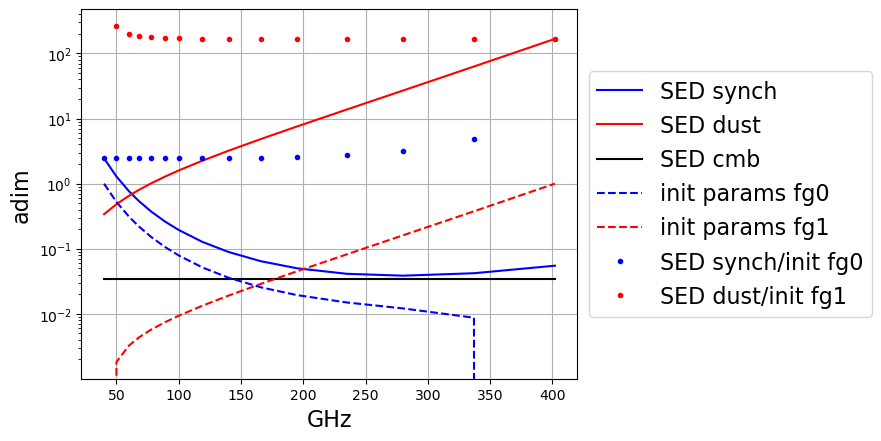

In [22]:
plt.plot(instrument.frequency, SED_synch, 'b', label='SED synch')
plt.plot(instrument.frequency, SED_dust, 'r', label='SED dust')
plt.plot(instrument.frequency, SED_cmb, 'k', label='SED cmb')

plt.plot(instrument.frequency, B_fgs[:, 0], 'b--', label='init params fg0')
plt.plot(instrument.frequency, B_fgs[:, 1], 'r--', label='init params fg1')

plt.plot(instrument.frequency, SED_synch/B_fgs[:, 0], 'b.', label='SED synch/init fg0')
plt.plot(instrument.frequency, SED_dust/B_fgs[:, 1], 'r.', label='SED dust/init fg1')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('GHz',fontsize=16)
plt.legend(fontsize=16, loc='center left',  bbox_to_anchor=(1, 0.5))
plt.ylabel('adim', fontsize=16)
plt.grid()